This notebook performs the Convolutional Neural Network for 'other' data.

Parameters:

4,8 mfcc coefficients

2048 samples per window width

512 samples per overlap

In [1]:
#Helper Function
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pylab as plt

#save all previous epochs for use in plotting learning curve
class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

Using TensorFlow backend.


In [2]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

#deep learning libraries
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
import sklearn
from sklearn import metrics

### this is where the magic happens

### 4 MFCCs

In [3]:
#load the variables
x_train=np.load('other_base_x_train.npy')
x_test=np.load('other_base_x_test.npy')
y_trainHot=np.load('other_base_y_train.npy')
y_testHot=np.load('other_base_y_test.npy')
class_weight=np.load('weights_other.npy')

In [4]:
#deep learning model

#a = x_train
#b = y_trainHot
#c = x_test
#d = y_testHot
def runCNNmodel(a,b,c,d):
    #batch=32
    #epochs=50
    num_labels=142
    one, two, three = x_train.shape[1], x_train.shape[2], x_train.shape[3]
    input_shape = (one, two, three)
    #intialize model
    model=Sequential()
    
    #visible layers
    model.add(Conv2D(filters=32, kernel_size=(1,1), activation='relu',input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(1,1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.15))
    
    #output nodes
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) #hidden layers
    model.add(Dropout(0.15))
    model.add(Dense(num_labels, activation='softmax'))
    
    return model

In [5]:
#run the model
model=runCNNmodel(x_train,y_trainHot,x_test,y_testHot)

In [6]:
#generate the breakdown of trainable parameters each step in the process
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 4, 32)          18784     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 4, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 4, 32)          128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [7]:
#compile the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#train the model
history=model.fit(x_train,y_trainHot,batch_size=32,epochs=5,validation_data=(x_test,y_testHot),callbacks=[MetricsCheckpoint('logs4D')], class_weight=class_weight)

Train on 11891 samples, validate on 3716 samples
Epoch 1/5
11891/11891 [==============================] - 3s 286us/step - loss: 4.3804 - acc: 0.0698 - val_loss: 3.5419 - val_acc: 0.1609
Epoch 2/5
11891/11891 [==============================] - 3s 257us/step - loss: 3.2917 - acc: 0.1828 - val_loss: 2.8513 - val_acc: 0.2796
Epoch 3/5
11891/11891 [==============================] - 3s 237us/step - loss: 2.8575 - acc: 0.2595 - val_loss: 2.4417 - val_acc: 0.3625
Epoch 4/5
11891/11891 [==============================] - 3s 242us/step - loss: 2.5616 - acc: 0.3149 - val_loss: 2.2356 - val_acc: 0.4128
Epoch 5/5
11891/11891 [==============================] - 3s 246us/step - loss: 2.3708 - acc: 0.3531 - val_loss: 2.1279 - val_acc: 0.4373


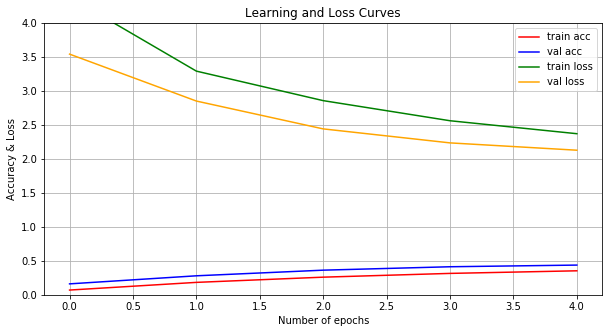

In [8]:
#plot the learning and loss curves together
plt.figure(figsize=(10,5))
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.plot(history.history['loss'], color='green')
plt.plot(history.history['val_loss'], color='orange')
plt.title('Learning and Loss Curves')
plt.ylim((0,4))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy & Loss')
plt.legend(['train acc','val acc','train loss','val loss'], loc='upper right')
plt.grid()
plt.show()

In [9]:
#load the validation data
x_val=np.load('other_base_x_val.npy')
y_valHot=np.load('other_base_y_val.npy')
#evaluate on outside data
model.evaluate(x=x_val, y=y_valHot, batch_size=32)

2973/2973 [==============================] - 0s 72us/step


[2.103224111012325, 0.42314160775845594]

### 8 MFCCs

In [18]:
#load the variables
x_train=np.load('other8_base_x_train.npy')
x_test=np.load('other8_base_x_test.npy')
y_trainHot=np.load('other8_base_y_train.npy')
y_testHot=np.load('other8_base_y_test.npy')
class_weight=np.load('weights_other.npy')

In [19]:
#deep learning model

#a = x_train
#b = y_trainHot
#c = x_test
#d = y_testHot
def runCNNmodel(a,b,c,d):
    #batch=32
    #epochs=50
    num_labels=142
    one, two, three = x_train.shape[1], x_train.shape[2], x_train.shape[3]
    input_shape = (one, two, three)
    #intialize model
    model=Sequential()
    
    #visible layers
    model.add(Conv2D(filters=32, kernel_size=(1,1), activation='relu',input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(1,1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.15)) 


    #output nodes
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) #hidden layers
    model.add(Dropout(0.15))
    model.add(Dense(num_labels, activation='softmax'))
    
    return model

In [20]:
#run the model
model=runCNNmodel(x_train,y_trainHot,x_test,y_testHot)

In [21]:
#generate the breakdown of trainable parameters each step in the process
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 1, 4, 32)          18784     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 4, 32)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 4, 32)          128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
__________

In [22]:
#compile the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#train the model
history2=model.fit(x_train,y_trainHot,batch_size=32,epochs=5,validation_data=(x_test,y_testHot),callbacks=[MetricsCheckpoint('logs4D')], class_weight=class_weight)

Train on 11891 samples, validate on 3716 samples
Epoch 1/5
11891/11891 [==============================] - 4s 296us/step - loss: 4.2874 - acc: 0.0745 - val_loss: 3.6823 - val_acc: 0.1340
Epoch 2/5
11891/11891 [==============================] - 3s 273us/step - loss: 3.2222 - acc: 0.1986 - val_loss: 2.7275 - val_acc: 0.3181
Epoch 3/5
11891/11891 [==============================] - 3s 269us/step - loss: 2.6699 - acc: 0.2978 - val_loss: 2.3031 - val_acc: 0.4031
Epoch 4/5
11891/11891 [==============================] - 3s 280us/step - loss: 2.4077 - acc: 0.3480 - val_loss: 2.1451 - val_acc: 0.4101
Epoch 5/5
11891/11891 [==============================] - 3s 248us/step - loss: 2.2583 - acc: 0.3856 - val_loss: 2.0463 - val_acc: 0.4403


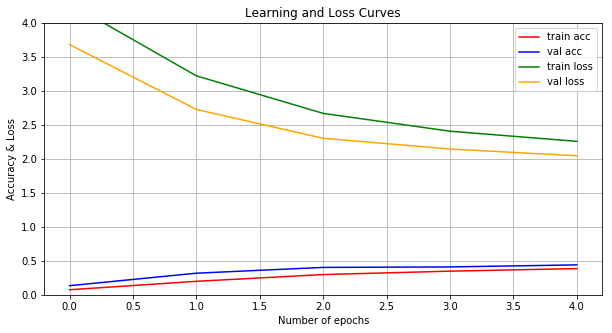

In [23]:
#plot the learning and loss curves together
plt.figure(figsize=(10,5))
plt.plot(history2.history['acc'], color='red')
plt.plot(history2.history['val_acc'], color='blue')
plt.plot(history2.history['loss'], color='green')
plt.plot(history2.history['val_loss'], color='orange')
plt.title('Learning and Loss Curves')
plt.ylim((0,4))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy & Loss')
plt.legend(['train acc','val acc','train loss','val loss'], loc='upper right')
plt.grid()
plt.show()

In [24]:
#load the validation data
x_val=np.load('other8_base_x_val.npy')
y_valHot=np.load('other8_base_y_val.npy')
#evaluate on outside data
model.evaluate(x=x_val, y=y_valHot, batch_size=32)

2973/2973 [==============================] - 0s 69us/step


[2.0169532210827676, 0.442986881817145]

### 32 MFCCs

In [25]:
#load the variables
x_train=np.load('other32_base_x_train.npy')
x_test=np.load('other32_base_x_test.npy')
y_trainHot=np.load('other32_base_y_train.npy')
y_testHot=np.load('other32_base_y_test.npy')
class_weight=np.load('weights_other.npy')

In [26]:
#deep learning model

#a = x_train
#b = y_trainHot
#c = x_test
#d = y_testHot
def runCNNmodel(a,b,c,d):
    #batch=32
    #epochs=50
    num_labels=142
    one, two, three = x_train.shape[1], x_train.shape[2], x_train.shape[3]
    input_shape = (one, two, three)
    #intialize model
    model=Sequential()
    
    #visible layers
    model.add(Conv2D(filters=32, kernel_size=(1,1), activation='relu',input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(1,1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.15)) 


    #output nodes
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) #hidden layers
    model.add(Dropout(0.15))
    model.add(Dense(num_labels, activation='softmax'))
    
    return model

In [27]:
#run the model
model=runCNNmodel(x_train,y_trainHot,x_test,y_testHot)

In [28]:
#generate the breakdown of trainable parameters each step in the process
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 32, 32)         18784     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 32, 32)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 32, 32)         128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 32, 32)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
__________

In [29]:
#compile the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#train the model
history3=model.fit(x_train,y_trainHot,batch_size=32,epochs=5,validation_data=(x_test,y_testHot),callbacks=[MetricsCheckpoint('logs4D')], class_weight=class_weight)

Train on 11891 samples, validate on 3716 samples
Epoch 1/5
11891/11891 [==============================] - 7s 559us/step - loss: 3.0053 - acc: 0.3483 - val_loss: 0.8166 - val_acc: 0.8450
Epoch 2/5
11891/11891 [==============================] - 7s 564us/step - loss: 0.4221 - acc: 0.8832 - val_loss: 0.1549 - val_acc: 0.9610
Epoch 3/5
11891/11891 [==============================] - 7s 588us/step - loss: 0.2006 - acc: 0.9419 - val_loss: 0.0973 - val_acc: 0.9758
Epoch 4/5
11891/11891 [==============================] - 6s 541us/step - loss: 0.1304 - acc: 0.9615 - val_loss: 0.0760 - val_acc: 0.9771
Epoch 5/5
11891/11891 [==============================] - 6s 531us/step - loss: 0.0947 - acc: 0.9740 - val_loss: 0.0573 - val_acc: 0.9833


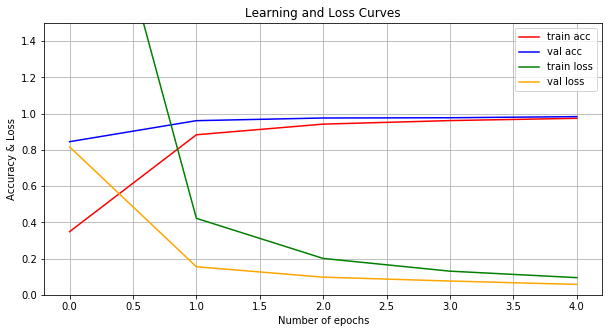

In [38]:
#plot the learning and loss curves together
plt.figure(figsize=(10,5))
plt.plot(history3.history['acc'], color='red')
plt.plot(history3.history['val_acc'], color='blue')
plt.plot(history3.history['loss'], color='green')
plt.plot(history3.history['val_loss'], color='orange')
plt.title('Learning and Loss Curves')
plt.ylim((0,1.5))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy & Loss')
plt.legend(['train acc','val acc','train loss','val loss'], loc='upper right')
plt.grid()
plt.show()

In [34]:
#load the validation data
x_val=np.load('other32_base_x_val.npy')
y_valHot=np.load('other32_base_y_val.npy')
#evaluate on outside data
model.evaluate(x=x_val, y=y_valHot, batch_size=32)

2973/2973 [==============================] - 1s 194us/step


[0.073586137749172, 0.9821728891569318]

### compare val accuracy by # of MFCCs

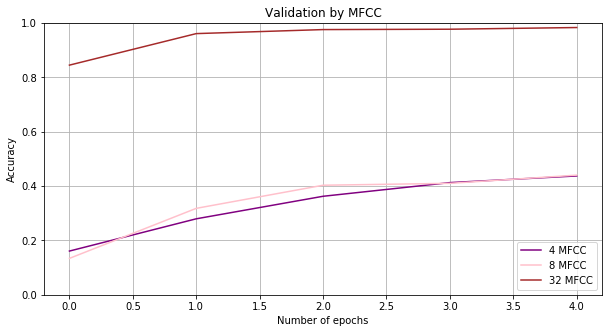

In [35]:
#8 MFCC vs 32 MFCC by validation accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['val_acc'], color='purple')
plt.plot(history2.history['val_acc'], color='pink')
plt.plot(history3.history['val_acc'], color='brown')
plt.title('Validation by MFCC')
plt.ylim((0,1))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(['4 MFCC','8 MFCC', '32 MFCC'], loc='lower right')
plt.grid()
plt.show()